# Entrada de dados

In [44]:
% matplotlib inline
from numpy import *
from matplotlib.pylab import *
from matplotlib.dates import *
import datetime as dt
import pandas as pd
import sys
#sys.path.append("/home/fer/myPYTHONstuff/modules/")
sys.path.append('/athena/rodel/Documentos/DIGISSONDAS/')
#sys.path.append('/media/fer/MAKITA/Gilmar_x/python_from/')
#from peakdetect import *

# Leitura dos arquivo e delimitação de colunas

# PERIODO 1

In [58]:

path = '/athena/rodel/Documentos/DIGISSONDAS/'
data1 = genfromtxt(path + 'FZ_2014_03.TXT',delimiter=[4]+[2]+[2]+[7]+[2]+[1]+[2]+[8]+[8]+[4]+[8]+[7]+[5])
data1[data1 == -1] = nan

#path = 'C:/Users/Antonio Davi/Desktop/ESTACAO_LISA/'
#data12 = genfromtxt(path + 'SL_2013_12.TXT',delimiter=[4]+[2]+[2]+[7]+[2]+[1]+[2]+[8]+[8]+[4]+[8]+[7]+[5])
#data12[data12 == -1] = nan

#path = 'C:/Users/Antonio Davi/Desktop/ESTACAO_LISA/'
#data01 = genfromtxt(path + 'SL_2014_01.TXT',delimiter=[4]+[2]+[2]+[7]+[2]+[1]+[2]+[8]+[8]+[4]+[8]+[7]+[5])
#data01[data01 == -1] = nan

#path = 'C:/Users/Antonio Davi/Desktop/ESTACAO_LISA/'
#data02 = genfromtxt(path + 'SL_2014_02.TXT',delimiter=[4]+[2]+[2]+[7]+[2]+[1]+[2]+[8]+[8]+[4]+[8]+[7]+[5])
#data02[data02 == -1] = nan

In [59]:
day  = data1[:,2]
hour = data1[:,4]
minu = data1[:,6]
TEC  = data1[:,7]
MUF  = data1[:,8]
foE  = data1[:,9]
foF2 = data1[:,10]
hF   = data1[:,11]
hmF2 = data1[:,12]
hMF  = (hmF2-hF)
NmF2 =1.24*(foF2*foF2)
SF   =1000*TEC/(1.24*foF2*foF2)


In [63]:
#conversão do Tempo em hora
    
t     =   hour + minu/60. #Time in hours
tg    =   dt.date(2014,3,1).toordinal()+ (day-1.) + hours(t)     #Gregorian time in day fractions
time_iono  =   num2date(tg)  



In [64]:
#crear un diccionario con los datos
data1 = {"TEC":TEC,"MUF":MUF,"foE":foE,"foF2":foF2,"hF":hF,"hmF2":hmF2,"hMF":hMF,"NmF2":NmF2,"SF":SF}

In [65]:
#crea un data frame con los datos del diccionario "data" y el indice "time"
df = pd.DataFrame(data1,index=time_iono)

df.index.minute

array([ 0, 10, 20, ..., 20, 30, 40], dtype=int32)

In [66]:
df['hour']=[ts.hour for ts in df.index]
df['minute']=[ts.minute for ts in df.index]

In [67]:
#crea un data frame con los datos del diccionario "data" y el indice "time"
df = pd.DataFrame(data1,index=time_iono)

df.index.minute

df['hour']=[ts.hour for ts in df.index]
df['minute']=[ts.minute for ts in df.index]


media = df.groupby(['hour','minute']).mean()
media[0:4]


time_media = pd.date_range('20140329 00:00','20140329 23:50',freq='10min')
time_media


DatetimeIndex(['2014-03-29 00:00:00', '2014-03-29 00:10:00',
               '2014-03-29 00:20:00', '2014-03-29 00:30:00',
               '2014-03-29 00:40:00', '2014-03-29 00:50:00',
               '2014-03-29 01:00:00', '2014-03-29 01:10:00',
               '2014-03-29 01:20:00', '2014-03-29 01:30:00',
               ...
               '2014-03-29 22:20:00', '2014-03-29 22:30:00',
               '2014-03-29 22:40:00', '2014-03-29 22:50:00',
               '2014-03-29 23:00:00', '2014-03-29 23:10:00',
               '2014-03-29 23:20:00', '2014-03-29 23:30:00',
               '2014-03-29 23:40:00', '2014-03-29 23:50:00'],
              dtype='datetime64[ns]', length=144, freq='10T')

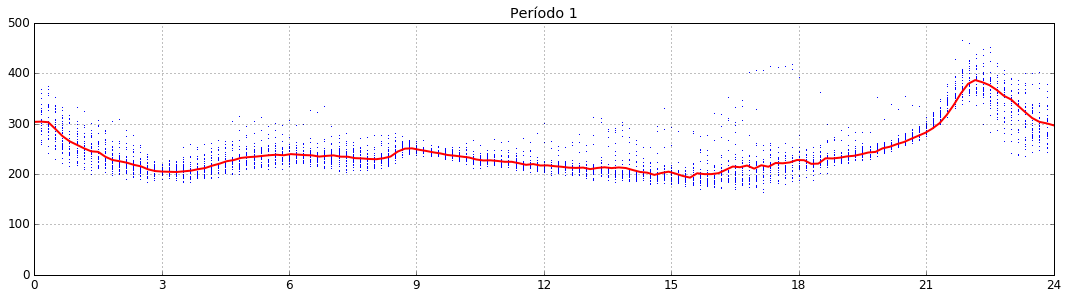

In [68]:
#Parameters to plot
rcParams['lines.linewidth']=2
rcParams['font.family']='sans-serif'
rcParams['font.serif']='Helvetica'
rcParams['figure.autolayout'] = True
rcParams['figure.figsize'] = 15,8
rcParams['font.size']=12


fig = plt.figure()
ax = fig.add_subplot(212)
ax1=ax.twiny()

ax1.plot(time_media,media.hF, color='red')
ax1.set_xticks([])

ax.plot(t,hF,',')
ax.set_ylim(bottom=0,top=500)

ax.set_xlim(0,24)
ax.set_xticks(np.linspace(0,24,9))
ax.set_title('Per'u'íodo 1')




ax.grid()



In [20]:
media = df.groupby(['hour','minute']).mean()
media[0:4]

MUF       NmF2          SF        TEC  foE      foF2  \
hour minute                                                               
0    0       17.543333  68.412867  178.170040  11.100000  NaN  6.900000   
     10      18.090000  67.327350  175.238517  10.666667  NaN  7.058333   
     20      17.480000  61.892740  147.673130   9.240000  NaN  6.570000   
     30      16.483333  56.723283  172.827076   9.283333  NaN  6.358333   

                     hF        hMF        hmF2  
hour minute                                     
0    0       411.883333  32.150000  444.033333  
     10      395.100000  52.150000  447.250000  
     20      385.700000  24.240000  409.940000  
     30      387.016667  43.483333  430.500000

In [22]:
time_media = pd.date_range('20140831 00:00','20140831 23:50',freq='10min')
time_media

<class 'pandas.tseries.index.DatetimeIndex'>
[2014-08-31 00:00:00, ..., 2014-08-31 23:50:00]
Length: 144, Freq: 10T, Timezone: None

# PERÍODO 2

In [24]:
data2=np.concatenate((data03,data04,data09,data10),axis=0)
np.shape(data2)


(5465, 13)

In [25]:
day2  = data2[:,2]
hour2 = data2[:,4]
minu2 = data2[:,6]
TEC2 = data2[:,7]
MUF2 = data2[:,8]
foE2   = data2[:,9]
foF22 = data2[:,10]
hF2  = data2[:,11]

D2=np.ediff1d(hF2,to_end=0)*(1.67)

 
hmF22 = data2[:,12]
hMF2 = (hmF22-hF2)

NmF22=1.24*(foF22*foF22)

SF2=1000*TEC2/(1.24*foF22*foF22)


In [26]:
#conversão do Tempo em hora
    
t2     =   hour2 + minu2/60. #Time in hours
tg2    =   dt.date(2014,1,1).toordinal()+ (day2-1.) + hours(t2)     #Gregorian time in day fractions
time2  =   num2date(tg2)  


In [27]:
#crear un diccionario con los datos
data2 = {"D2":D2,"TEC2":TEC2,"MUF2":MUF2,"foE2":foE2,"NmF22":NmF22,"foF22":foF22,"hF2":hF2,"hmF22":hmF22,"hMF2":hMF2,"SF2":SF2}

In [28]:
#crea un data frame con los datos del diccionario "data" y el indice "time"
df2 = pd.DataFrame(data2,index=time2)

df2.index.minute

df2['hour']=[ts.hour for ts in df2.index]
df2['minute']=[ts.minute for ts in df2.index]

media2 = df2.groupby(['hour','minute']).mean()
media2[0:4]


D2       MUF2      NmF22         SF2       TEC2  foE2  \
hour minute                                                                 
0    0      -11.549368  22.682895  90.473418  147.345757  12.489474   NaN   
     10      -6.549108  22.516842  88.507529  149.069830  12.302632   NaN   
     20      -5.253730  22.282703  85.620492  149.158343  12.127027   NaN   
     30     -10.767105  21.860789  81.616555  149.583173  11.457895   NaN   

                foF22         hF2       hMF2       hmF22  
hour minute                                               
0    0       8.269737  357.997368  53.000000  410.997368  
     10      8.217105  351.081579  60.123684  411.205263  
     20      8.062162  344.918919  56.697297  401.616216  
     30      7.888158  344.371053  59.805263  404.176316

In [29]:

time2_media2 = pd.date_range('20140831 00:00','20140831 23:50',freq='10min')
time2_media2




<class 'pandas.tseries.index.DatetimeIndex'>
[2014-08-31 00:00:00, ..., 2014-08-31 23:50:00]
Length: 144, Freq: 10T, Timezone: None

In [30]:
media2 = df2.groupby(['hour','minute']).mean()
media2[0:4]

D2       MUF2      NmF22         SF2       TEC2  foE2  \
hour minute                                                                 
0    0      -11.549368  22.682895  90.473418  147.345757  12.489474   NaN   
     10      -6.549108  22.516842  88.507529  149.069830  12.302632   NaN   
     20      -5.253730  22.282703  85.620492  149.158343  12.127027   NaN   
     30     -10.767105  21.860789  81.616555  149.583173  11.457895   NaN   

                foF22         hF2       hMF2       hmF22  
hour minute                                               
0    0       8.269737  357.997368  53.000000  410.997368  
     10      8.217105  351.081579  60.123684  411.205263  
     20      8.062162  344.918919  56.697297  401.616216  
     30      7.888158  344.371053  59.805263  404.176316

In [31]:
V2=np.ediff1d(media2.hF2,to_end=0)*(1.67) 

In [32]:
V=np.ediff1d(media.hF,to_end=0)*(1.67) 

In [33]:
V1=np.ediff1d(media1.hF1,to_end=0)*(1.67) 

In [34]:
#M2=14900/(media2.hmF22+176)-0.18/((media2.foF22/media2.foE2)- 1.4)

In [35]:
#M2=14900/(media2.hmF22+176)

In [36]:
print(media2).to_csv('C:/Users/Antonio Davi/Desktop/SL/PERÍODO 2.txt')

None


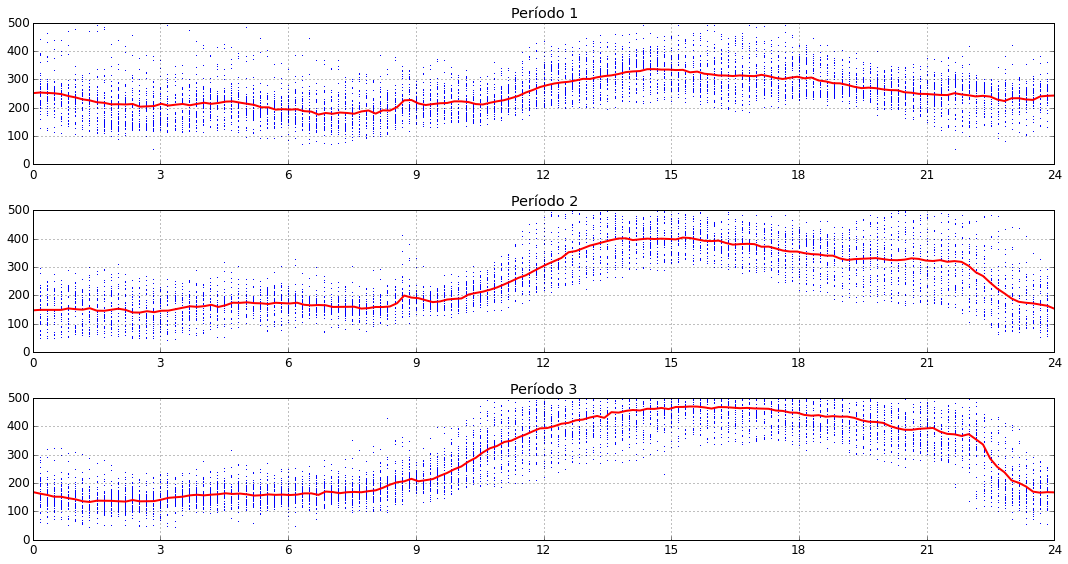

In [37]:
#Parameters to plot
rcParams['lines.linewidth']=2
rcParams['font.family']='sans-serif'
rcParams['font.serif']='Helvetica'
rcParams['figure.autolayout'] = True
rcParams['figure.figsize'] = 15,8
rcParams['font.size']=12


fig = plt.figure()
ax = fig.add_subplot(311)
ax1=ax.twiny()

ax1.plot(time_media,media.SF, color='red')
ax1.set_xticks([])

ax.plot(t,SF,',')
ax.set_ylim(bottom=0,top=500)

ax.set_xlim(0,24)
ax.set_xticks(np.linspace(0,24,9))
ax.set_title('Per'u'íodo 1')
ax.grid()


#PERÍODO 2

#fig = plt.figure()
ax = fig.add_subplot(312)
ax1=ax.twiny()

ax1.plot(time2_media2,media2.SF2, color='red')
ax1.set_xticks([])

ax.plot(t2,SF2,',')
ax.set_ylim(bottom=0,top=500)

ax.set_xlim(0,24)
ax.set_xticks(np.linspace(0,24,9))
ax.set_title('Per'u'íodo 2')
ax.grid()


#fig = plt.figure()
ax = fig.add_subplot(313)
ax1=ax.twiny()

ax1.plot(time1_media1,media1.SF1, color='red')
ax1.set_xticks([])

ax.plot(t1,SF1,',')
ax.set_ylim(bottom=0,top=500)

ax.set_xlim(0,24)
ax.set_xticks(np.linspace(0,24,9))
ax.set_title('Per'u'íodo 3')


ax1.set_ylabel('[MHz]')
ax.grid()

# fazendo a medias entre estacoes do ano

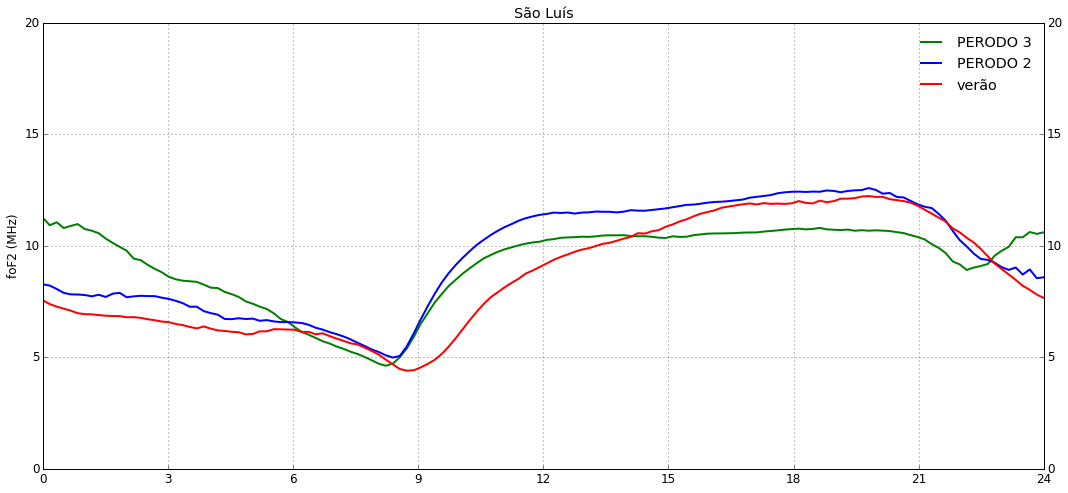

In [38]:
#Parameters to plot
rcParams['lines.linewidth']=2
rcParams['font.family']='sans-serif'
rcParams['font.serif']='Helvetica'
rcParams['figure.autolayout'] = True
rcParams['figure.figsize'] = 15,20
rcParams['font.size']=12


fig = plt.figure()
ax = fig.add_subplot(311)
ax1=ax.twiny()

bx1=ax.twinx()
bx1.set_ylim(bottom=0,top=20)


ax1.plot(time1_media1,media1.foF21, color='green', label = 'PERODO 3')

#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax1.set_xticks([])

#ax.plot(t,SF,',')
ax.set_ylim(bottom=0,top=20)

ax.set_xlim(0,24)
ax.set_xticks(np.linspace(0,24,9))
#ax.set_title('PERÍODO 3')
ax.grid()


#PERÍODO 2

#fig = plt.figure()
ax2 = fig.add_subplot(311)
ax3=ax2.twiny()

ax3.plot(time2_media2,media2.foF22, color='blue',label='PERODO 2')
#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax3.set_xticks([])

#ax.plot(t2,SF2,',')
ax2.set_ylim(bottom=0,top=20)

ax2.set_xlim(0,24)
ax2.set_xticks(np.linspace(0,24,9))
#ax2.set_title('Equin'u'ó''cios')
ax2.grid()


#fig = plt.figure()
ax4 = fig.add_subplot(311)
ax5=ax4.twiny()

ax5.plot(time_media,media.foF2, color='red',label = 'ver'u'ão')
#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax5.set_xticks([])

#ax.plot(t1,SF1,',')
ax4.set_ylim(bottom=0,top=20)

ax4.set_xlim(0,24)
ax4.set_xticks(np.linspace(0,24,9))
ax4.set_title('S'u'ão Lu'u'ís')


ax2.set_ylabel('foF2 (MHz)')


h1,l1=ax1.get_legend_handles_labels()
h3,l3=ax3.get_legend_handles_labels()
h5,l5=ax5.get_legend_handles_labels()

ax1.legend(h1+h3+h5,l1+l3+l5,loc=0,frameon=False)


ax.grid()

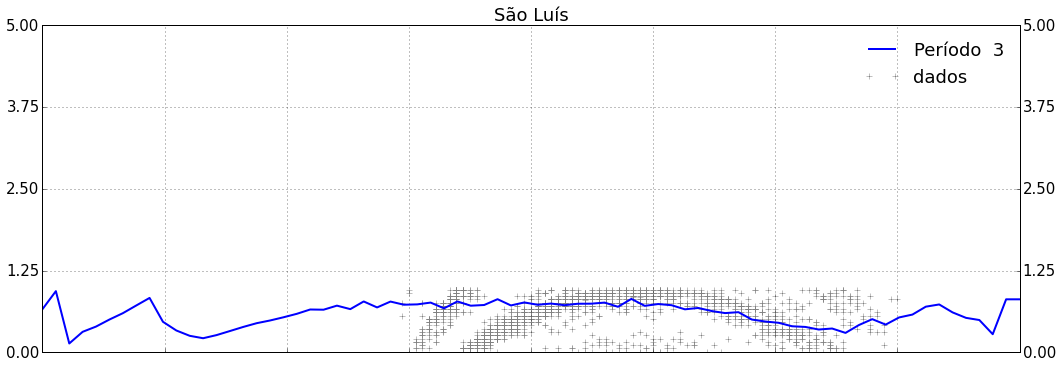

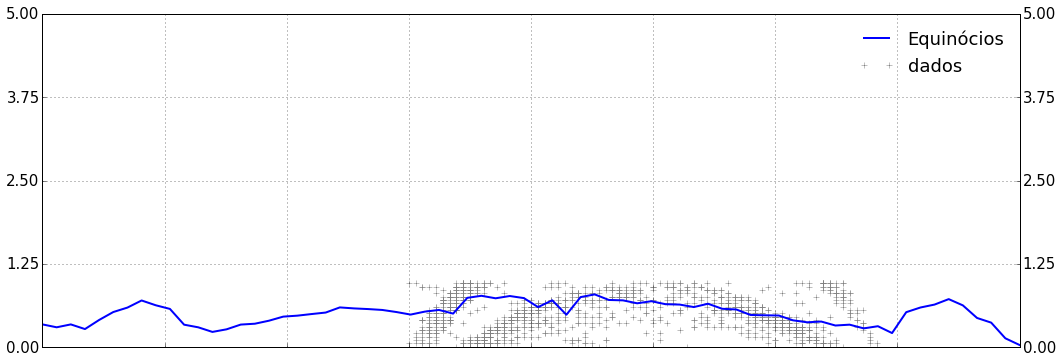

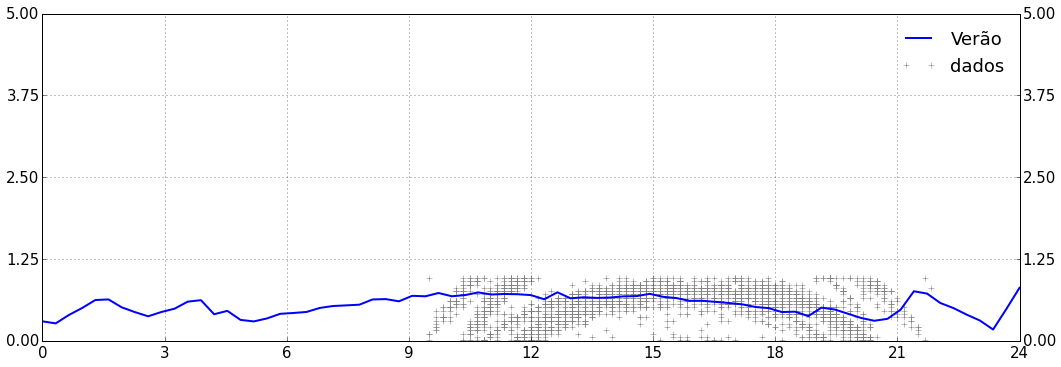

In [39]:
#Parameters to plot
rcParams['lines.linewidth']=2
rcParams['font.family']='sans-serif'
rcParams['font.serif']='Helvetica'
rcParams['figure.autolayout'] = True
rcParams['figure.figsize'] = 15,15
rcParams['font.size']=15


fig = plt.figure()
ax = fig.add_subplot(311)
ax1=ax.twiny()

bx1=ax.twinx()
bx1.set_ylim(bottom=0,top=5)
bx1.set_yticks(np.linspace(0,5,5))


ax1.plot(time1_media1,media1.foE1, color='blue', label = 'Per'u'íodo  3')


#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax1.set_xticks([])
ax.plot(t1,foE1,marker='+', color='gray',label='dados',lw=0)
ax.set_ylim(bottom=0,top=5)
ax.set_yticks(np.linspace(0,5,5))

ax.set_xlim(0,24)
ax.set_xticks(np.linspace(0,24,9))
ax.set_xticklabels([])
#ax.set_title('PERÍODO 3')




h1,l1=ax1.get_legend_handles_labels()
h,l=ax.get_legend_handles_labels()
#h3,l3=ax3.get_legend_handles_labels()
#h5,l5=ax5.get_legend_handles_labels()

#ax1.legend(h1+h3+h5,l1+l3+l5,loc=0,frameon=False)
ax1.legend(h1+h,l1+l,loc=0,frameon=False)

ax.grid()




fig1 = plt.figure()
ax2 = fig1.add_subplot(312)
ax3=ax2.twiny()

bx3=ax2.twinx()
bx3.set_ylim(bottom=0,top=5)
bx3.set_yticks(np.linspace(0,5,5))


ax3.plot(time2_media2,media2.foE2, color='blue', label = 'Equin'u'ócios')

#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax3.set_xticks([])

ax2.plot(t2,foE2,marker='+', color='gray',label='dados',lw=0)
ax2.set_ylim(bottom=0,top=5)
ax2.set_yticks(np.linspace(0,5,5))

ax2.set_xlim(0,24)
ax2.set_xticks(np.linspace(0,24,9))
ax2.set_xticklabels([])
#ax.set_title('PERÍODO 3')




h2,l2=ax2.get_legend_handles_labels()
h3,l3=ax3.get_legend_handles_labels()
#h5,l5=ax5.get_legend_handles_labels()

#ax1.legend(h1+h3+h5,l1+l3+l5,loc=0,frameon=False)
ax3.legend(h3+h2,l3+l2,loc=0,frameon=False)

ax2.grid()







fig2 = plt.figure()
ax4 = fig2.add_subplot(313)
ax5=ax4.twiny()

bx5=ax4.twinx()
bx5.set_ylim(bottom=0,top=5)
bx5.set_yticks(np.linspace(0,5,5))


ax5.plot(time_media,media.foE, color='blue', label = 'Ver'u'ão')

#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax5.set_xticks([])

ax4.plot(t,foE,marker='+', color='gray',label='dados',lw=0)
ax4.set_ylim(bottom=0,top=5)
ax4.set_yticks(np.linspace(0,5,5))

ax4.set_xlim(0,24)
ax4.set_xticks(np.linspace(0,24,9))
#ax4.set_xticklabels([])
ax.set_title('S'u'ão Lu'u'ís')




#h1,l1=ax1.get_legend_handles_labels()
h4,l4=ax4.get_legend_handles_labels()
h5,l5=ax5.get_legend_handles_labels()

#ax1.legend(h1+h3+h5,l1+l3+l5,loc=0,frameon=False)
ax5.legend(h5+h4,l5+l4,loc=0,frameon=False)

ax4.grid()



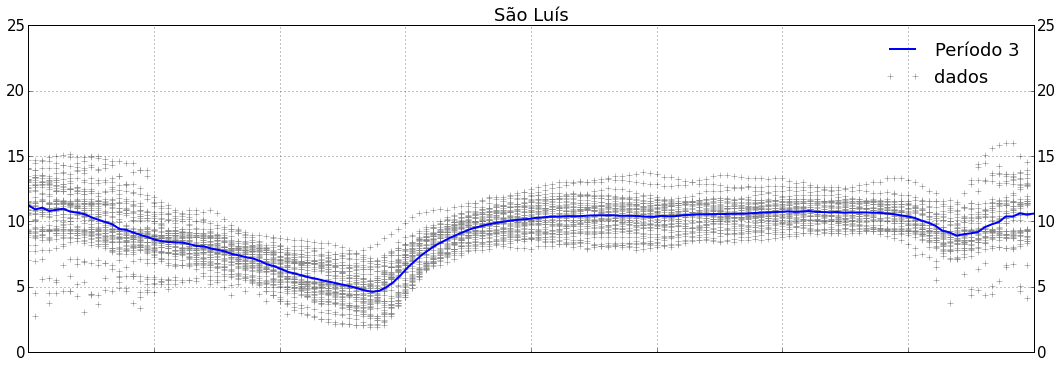

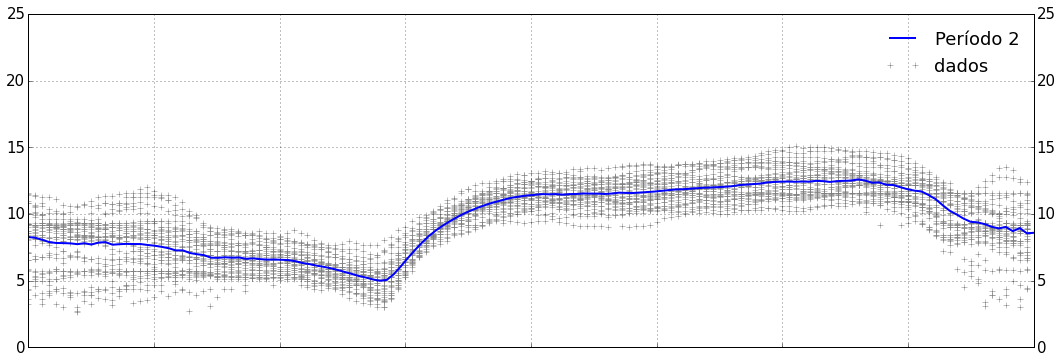

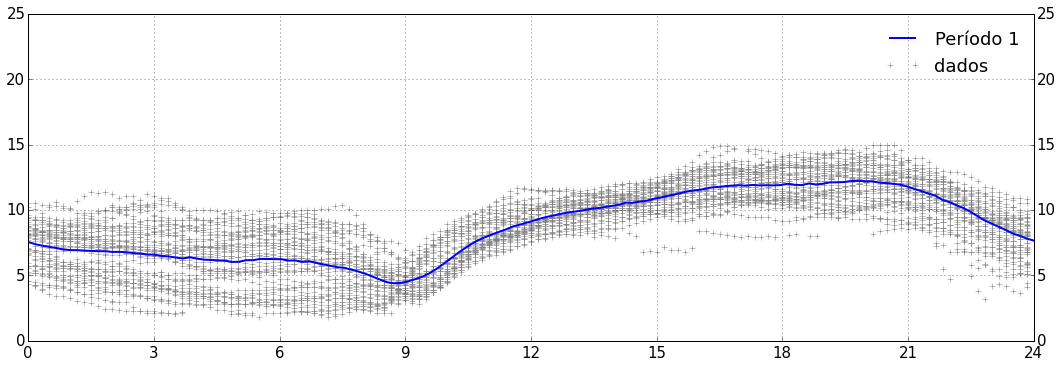

In [40]:
#Parameters to plot
rcParams['lines.linewidth']=2
rcParams['font.family']='sans-serif'
rcParams['font.serif']='Helvetica'
rcParams['figure.autolayout'] = True
rcParams['figure.figsize'] = 15,15
rcParams['font.size']=15


fig = plt.figure()
ax = fig.add_subplot(311)
ax1=ax.twiny()

bx1=ax.twinx()
bx1.set_ylim(bottom=0,top=25)
bx1.set_yticks(np.linspace(0,25,6))


ax1.plot(time1_media1,media1.foF21, color='blue', label = 'Per'u'íodo 3')


#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax1.set_xticks([])
ax.plot(t1,foF21,marker='+', color='gray',label='dados',lw=0)
ax.set_ylim(bottom=0,top=25)
ax.set_yticks(np.linspace(0,25,6))

ax.set_xlim(0,24)
ax.set_xticks(np.linspace(0,24,9))
ax.set_xticklabels([])
#ax.set_title('PERÍODO 3')




h1,l1=ax1.get_legend_handles_labels()
h,l=ax.get_legend_handles_labels()
#h3,l3=ax3.get_legend_handles_labels()
#h5,l5=ax5.get_legend_handles_labels()

#ax1.legend(h1+h3+h5,l1+l3+l5,loc=0,frameon=False)
ax1.legend(h1+h,l1+l,loc=0,frameon=False)

ax.grid()




fig1 = plt.figure()
ax2 = fig1.add_subplot(312)
ax3=ax2.twiny()

bx3=ax2.twinx()
bx3.set_ylim(bottom=0,top=25)
bx3.set_yticks(np.linspace(0,25,6))


ax3.plot(time2_media2,media2.foF22, color='blue', label = 'Per'u'íodo 2')

#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax3.set_xticks([])

ax2.plot(t2,foF22,marker='+', color='gray',label='dados',lw=0)
ax2.set_ylim(bottom=0,top=25)
ax2.set_yticks(np.linspace(0,25,6))

ax2.set_xlim(0,24)
ax2.set_xticks(np.linspace(0,24,9))
ax2.set_xticklabels([])
#ax.set_title('PERÍODO 3')




h2,l2=ax2.get_legend_handles_labels()
h3,l3=ax3.get_legend_handles_labels()
#h5,l5=ax5.get_legend_handles_labels()

#ax1.legend(h1+h3+h5,l1+l3+l5,loc=0,frameon=False)
ax3.legend(h3+h2,l3+l2,loc=0,frameon=False)

ax2.grid()







fig2 = plt.figure()
ax4 = fig2.add_subplot(313)
ax5=ax4.twiny()

bx5=ax4.twinx()
bx5.set_ylim(bottom=0,top=25)
bx5.set_yticks(np.linspace(0,25,6))


ax5.plot(time_media,media.foF2, color='blue', label = 'Per'u'íodo 1')

#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax5.set_xticks([])

ax4.plot(t,foF2,marker='+', color='gray',label='dados',lw=0)
ax4.set_ylim(bottom=0,top=25)
ax4.set_yticks(np.linspace(0,25,6))

ax4.set_xlim(0,24)
ax4.set_xticks(np.linspace(0,24,9))
#ax4.set_xticklabels([])
ax.set_title('S'u'ão Lu'u'ís')




#h1,l1=ax1.get_legend_handles_labels()
h4,l4=ax4.get_legend_handles_labels()
h5,l5=ax5.get_legend_handles_labels()

#ax1.legend(h1+h3+h5,l1+l3+l5,loc=0,frameon=False)
ax5.legend(h5+h4,l5+l4,loc=0,frameon=False)

ax4.grid()



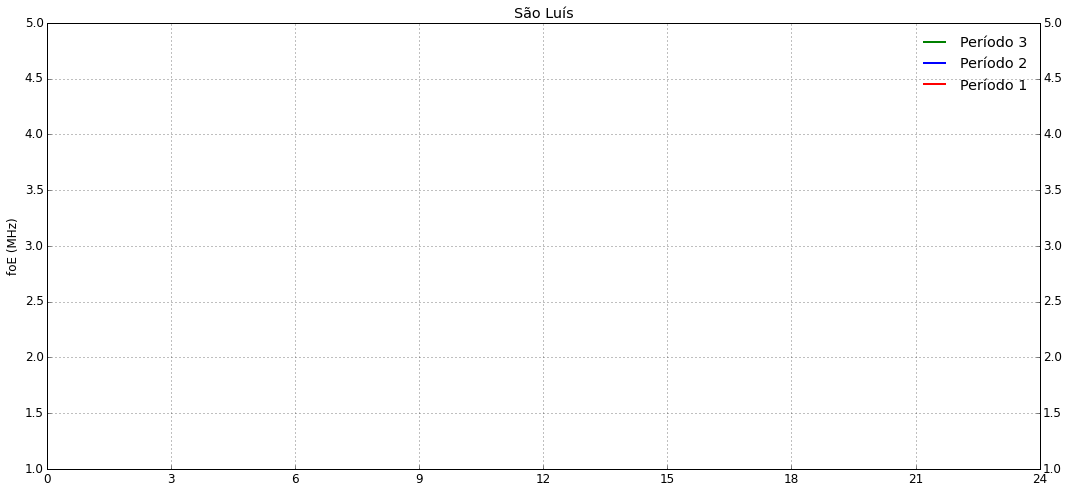

In [41]:
#Parameters to plot
rcParams['lines.linewidth']=2
rcParams['font.family']='sans-serif'
rcParams['font.serif']='Helvetica'
rcParams['figure.autolayout'] = True
rcParams['figure.figsize'] = 15,20
rcParams['font.size']=12


fig = plt.figure()
ax = fig.add_subplot(311)
ax1=ax.twiny()

bx1=ax.twinx()
bx1.set_ylim(bottom=1,top=5)


ax1.plot(time1_media1,media1.foE1, color='green', label = 'Per'u'íodo 3')

#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax1.set_xticks([])

#ax.plot(t,SF,',')
ax.set_ylim(bottom=1,top=5)

#ax.set_xlim(0,24)
#ax.set_xticks(np.linspace(0,24,9))
#ax.set_title('PERÍODO 3')
ax.grid()


#PERÍODO 2

#fig = plt.figure()
ax2 = fig.add_subplot(311)
ax3=ax2.twiny()

ax3.plot(time2_media2,media2.foE2, color='blue',label='Per'u'íodo 2')
#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax3.set_xticks([])

#ax3.plot(t2,SF2,',')
ax2.set_ylim(bottom=1,top=5)

#ax2.set_xlim(0,24)
#ax2.set_xticks(np.linspace(0,24,9))
#ax2.set_title('Equin'u'ó''cios')
ax2.grid()


#fig = plt.figure()
ax4 = fig.add_subplot(311)
ax5=ax4.twiny()

ax5.plot(time_media,media.foE, color='red',label = 'Per'u'íodo 1')
#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax5.set_xticks([])

#ax.plot(t1,SF1,',')
ax4.set_ylim(bottom=1,top=5)

ax4.set_xlim(0,24)
ax4.set_xticks(np.linspace(0,24,9))
ax4.set_title('S'u'ão Lu'u'ís')


ax2.set_ylabel('foE (MHz)')


h1,l1=ax1.get_legend_handles_labels()
h3,l3=ax3.get_legend_handles_labels()
h5,l5=ax5.get_legend_handles_labels()

ax1.legend(h1+h3+h5,l1+l3+l5,loc=0,frameon=False)


ax.grid()

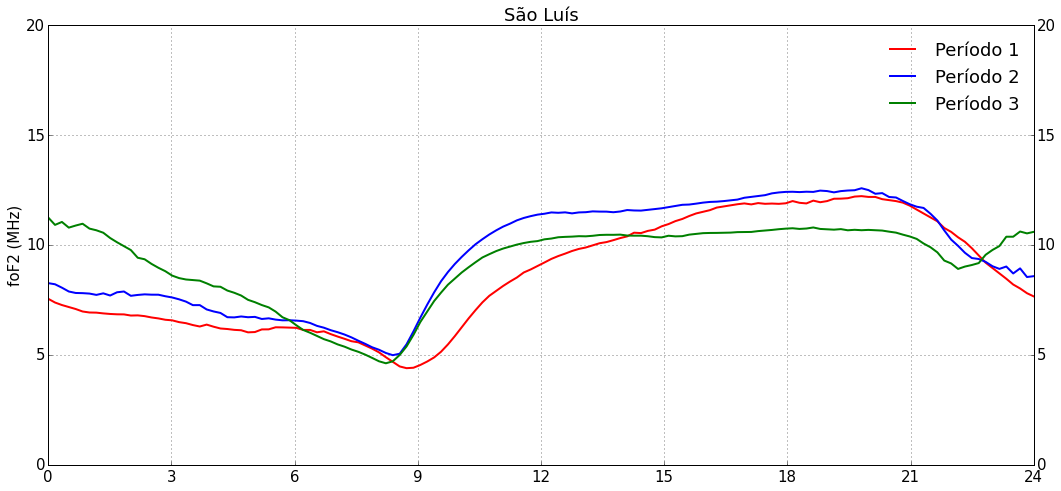

In [42]:
#Parameters to plot
rcParams['lines.linewidth']=2
rcParams['font.family']='sans-serif'
rcParams['font.serif']='Helvetica'
rcParams['figure.autolayout'] = True
rcParams['figure.figsize'] = 15,20
rcParams['font.size']=15


fig = plt.figure()
ax = fig.add_subplot(311)
ax1=ax.twiny()

bx1=ax.twinx()
bx1.set_ylim(bottom=0,top=20)



ax1.plot(time_media,media.foF2, color='red',label = 'Per'u'íodo 1')

#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax1.set_xticks([])

#ax.plot(t,SF,',')
ax.set_ylim(bottom=0,top=20)

#ax.set_xlim(0,24)
#ax.set_xticks(np.linspace(0,24,9))
#ax.set_title('PERÍODO 3')
ax.grid()


#PERÍODO 2

#fig = plt.figure()
ax2 = fig.add_subplot(311)
ax3=ax2.twiny()

ax3.plot(time2_media2,media2.foF22, color='blue',label='Per'u'íodo 2')
#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax3.set_xticks([])

#ax3.plot(t2,SF2,',')
ax2.set_ylim(bottom=0,top=20)

#ax2.set_xlim(0,24)
#ax2.set_xticks(np.linspace(0,24,9))
#ax2.set_title('Equin'u'ó''cios')
ax2.grid()


#fig = plt.figure()
ax4 = fig.add_subplot(311)
ax5=ax4.twiny()

ax5.plot(time1_media1,media1.foF21, color='green', label = 'Per'u'íodo 3')
#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax5.set_xticks([])

#ax.plot(t1,SF1,',')
ax4.set_ylim(bottom=0,top=20)

ax4.set_xlim(0,24)
ax4.set_xticks(np.linspace(0,24,9))
ax4.set_title('S'u'ão Lu'u'ís')


ax2.set_ylabel('foF2 (MHz)')


h1,l1=ax1.get_legend_handles_labels()
h3,l3=ax3.get_legend_handles_labels()
h5,l5=ax5.get_legend_handles_labels()

ax1.legend(h1+h3+h5,l1+l3+l5,loc=0,frameon=False)


ax.grid()

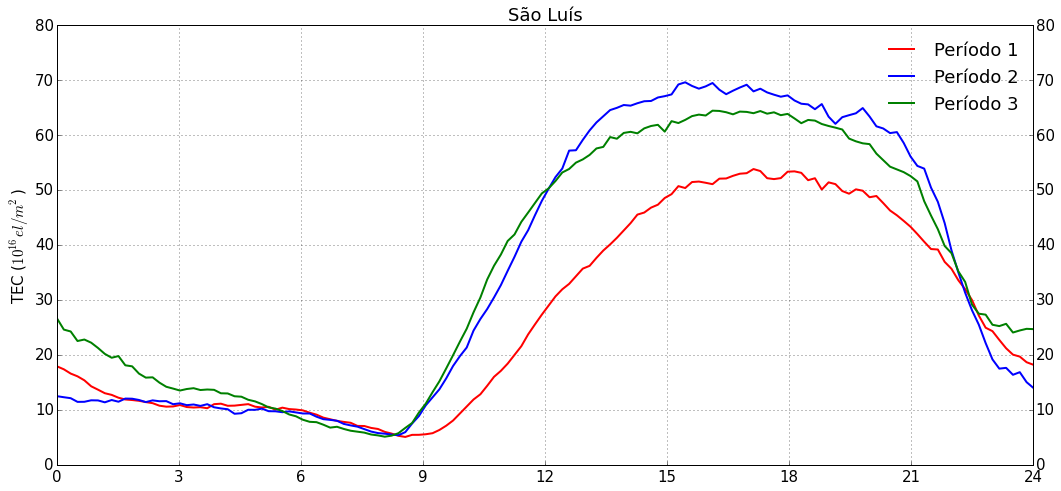

In [61]:
#Parameters to plot
rcParams['lines.linewidth']=2
rcParams['font.family']='sans-serif'
rcParams['font.serif']='Helvetica'
rcParams['figure.autolayout'] = True
rcParams['figure.figsize'] = 15,20
rcParams['font.size']=15


fig = plt.figure()
ax = fig.add_subplot(311)
ax1=ax.twiny()

bx1=ax.twinx()
bx1.set_ylim(bottom=0,top=80)



ax1.plot(time_media,media.TEC, color='red',label = 'Per'u'íodo 1')

#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax1.set_xticks([])

#ax.plot(t,SF,',')
ax.set_ylim(bottom=0,top=80)

#ax.set_xlim(0,24)
#ax.set_xticks(np.linspace(0,24,9))
#ax.set_title('PERÍODO 3')
ax.grid()


#PERÍODO 2

#fig = plt.figure()
ax2 = fig.add_subplot(311)
ax3=ax2.twiny()

ax3.plot(time2_media2,media2.TEC2, color='blue',label='Per'u'íodo 2')
#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax3.set_xticks([])

#ax3.plot(t2,SF2,',')
ax2.set_ylim(bottom=0,top=80)

#ax2.set_xlim(0,24)
#ax2.set_xticks(np.linspace(0,24,9))
#ax2.set_title('Equin'u'ó''cios')
ax2.grid()


#fig = plt.figure()
ax4 = fig.add_subplot(311)
ax5=ax4.twiny()

ax5.plot(time1_media1,media1.TEC1, color='green', label = 'Per'u'íodo 3')
#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax5.set_xticks([])

#ax.plot(t1,SF1,',')
ax4.set_ylim(bottom=0,top=80)

ax4.set_xlim(0,24)
ax4.set_xticks(np.linspace(0,24,9))
ax4.set_title('S'u'ão Lu'u'ís')


ax2.set_ylabel('TEC ($10^{16} el/m^2$)')


h1,l1=ax1.get_legend_handles_labels()
h3,l3=ax3.get_legend_handles_labels()
h5,l5=ax5.get_legend_handles_labels()

ax1.legend(h1+h3+h5,l1+l3+l5,loc=0,frameon=False)


ax.grid()

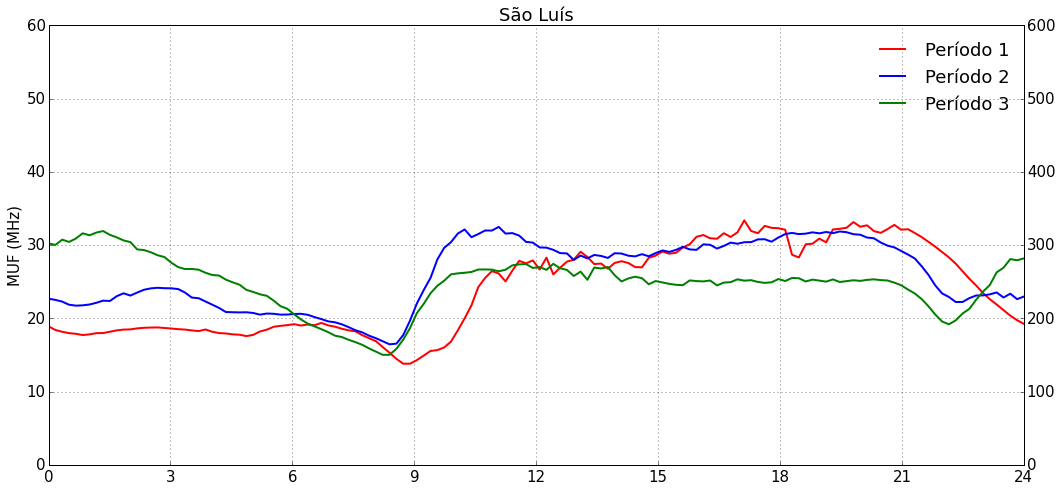

In [44]:
#Parameters to plot
rcParams['lines.linewidth']=2
rcParams['font.family']='sans-serif'
rcParams['font.serif']='Helvetica'
rcParams['figure.autolayout'] = True
rcParams['figure.figsize'] = 15,20
rcParams['font.size']=15


fig = plt.figure()
ax = fig.add_subplot(311)
ax1=ax.twiny()

bx1=ax.twinx()
bx1.set_ylim(bottom=0,top=600)



ax1.plot(time_media,media.MUF, color='red',label = 'Per'u'íodo 1')

#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax1.set_xticks([])

#ax.plot(t,SF,',')
ax.set_ylim(bottom=0,top=60)

#ax.set_xlim(0,24)
#ax.set_xticks(np.linspace(0,24,9))
#ax.set_title('PERÍODO 3')
ax.grid()


#PERÍODO 2

#fig = plt.figure()
ax2 = fig.add_subplot(311)
ax3=ax2.twiny()

ax3.plot(time2_media2,media2.MUF2, color='blue',label='Per'u'íodo 2')
#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax3.set_xticks([])

#ax3.plot(t2,SF2,',')
ax2.set_ylim(bottom=0,top=60)

#ax2.set_xlim(0,24)
#ax2.set_xticks(np.linspace(0,24,9))
#ax2.set_title('Equin'u'ó''cios')
ax2.grid()


#fig = plt.figure()
ax4 = fig.add_subplot(311)
ax5=ax4.twiny()

ax5.plot(time1_media1,media1.MUF1, color='green', label = 'Per'u'íodo 3')
#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax5.set_xticks([])

#ax.plot(t1,SF1,',')
ax4.set_ylim(bottom=0,top=60)

ax4.set_xlim(0,24)
ax4.set_xticks(np.linspace(0,24,9))
ax4.set_title('S'u'ão Lu'u'ís')


ax2.set_ylabel('MUF (MHz)')


h1,l1=ax1.get_legend_handles_labels()
h3,l3=ax3.get_legend_handles_labels()
h5,l5=ax5.get_legend_handles_labels()

ax1.legend(h1+h3+h5,l1+l3+l5,loc=0,frameon=False)


ax.grid()




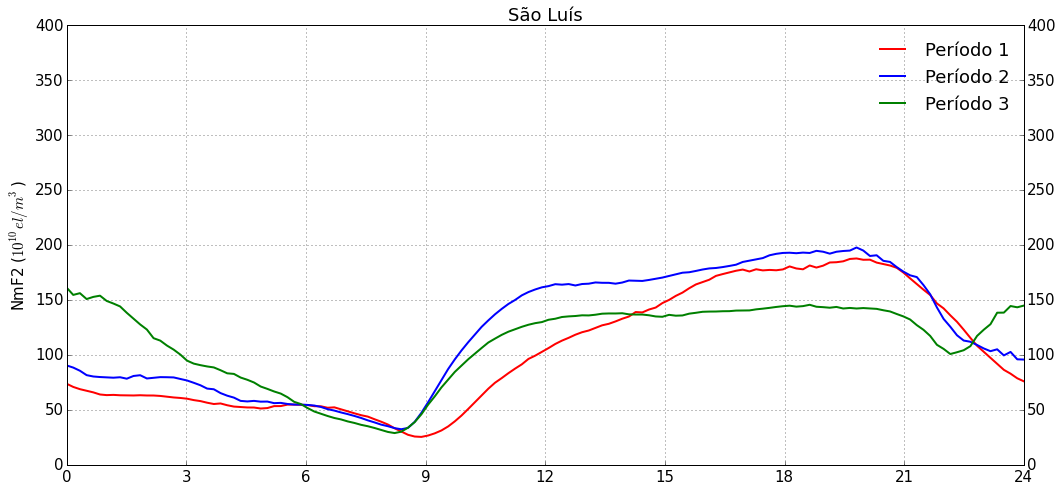

In [45]:
#Parameters to plot
rcParams['lines.linewidth']=2
rcParams['font.family']='sans-serif'
rcParams['font.serif']='Helvetica'
rcParams['figure.autolayout'] = True
rcParams['figure.figsize'] = 15,20
rcParams['font.size']=15


fig = plt.figure()
ax = fig.add_subplot(311)
ax1=ax.twiny()

bx1=ax.twinx()
bx1.set_ylim(bottom=0,top=400)



ax1.plot(time_media,media.NmF2, color='red',label = 'Per'u'íodo 1')

#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax1.set_xticks([])

#ax.plot(t,SF,',')
ax.set_ylim(bottom=0,top=400)

#ax.set_xlim(0,24)
#ax.set_xticks(np.linspace(0,24,9))
#ax.set_title('PERÍODO 3')
ax.grid()


#PERÍODO 2

#fig = plt.figure()
ax2 = fig.add_subplot(311)
ax3=ax2.twiny()

ax3.plot(time2_media2,media2.NmF22, color='blue',label='Per'u'íodo 2')
#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax3.set_xticks([])

#ax3.plot(t2,SF2,',')
ax2.set_ylim(bottom=0,top=400)

#ax2.set_xlim(0,24)
#ax2.set_xticks(np.linspace(0,24,9))
#ax2.set_title('Equin'u'ó''cios')
ax2.grid()


#fig = plt.figure()
ax4 = fig.add_subplot(311)
ax5=ax4.twiny()

ax5.plot(time1_media1,media1.NmF21, color='green', label = 'Per'u'íodo 3')
#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax5.set_xticks([])

#ax.plot(t1,SF1,',')
ax4.set_ylim(bottom=0,top=400)

ax4.set_xlim(0,24)
ax4.set_xticks(np.linspace(0,24,9))
ax4.set_title('S'u'ão Lu'u'ís')


ax2.set_ylabel('NmF2 ($10^{10} el/m^3$)')


h1,l1=ax1.get_legend_handles_labels()
h3,l3=ax3.get_legend_handles_labels()
h5,l5=ax5.get_legend_handles_labels()

ax1.legend(h1+h3+h5,l1+l3+l5,loc=0,frameon=False)


ax.grid()

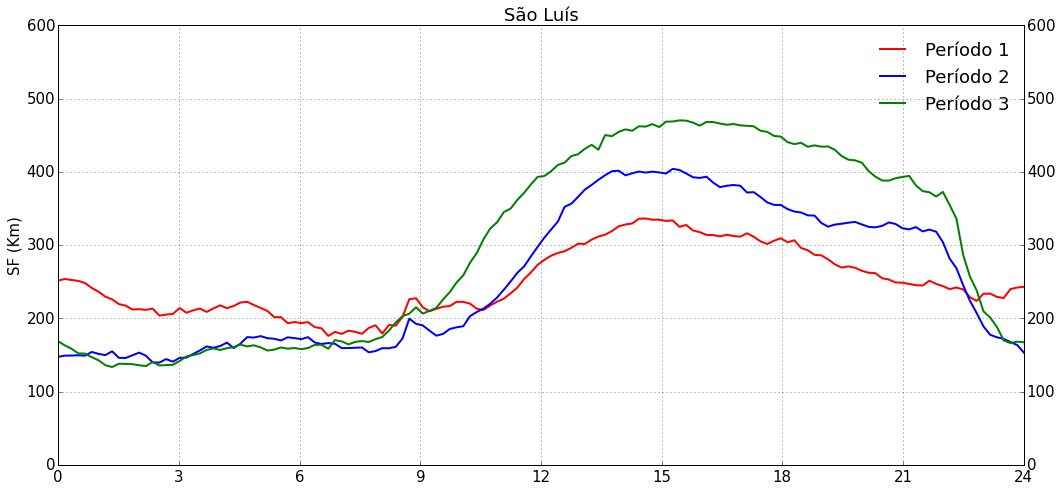

In [46]:
#Parameters to plot
rcParams['lines.linewidth']=2
rcParams['font.family']='sans-serif'
rcParams['font.serif']='Helvetica'
rcParams['figure.autolayout'] = True
rcParams['figure.figsize'] = 15,20
rcParams['font.size']=15


fig = plt.figure()
ax = fig.add_subplot(311)
ax1=ax.twiny()

bx1=ax.twinx()
bx1.set_ylim(bottom=0,top=600)



ax1.plot(time_media,media.SF, color='red',label = 'Per'u'íodo 1')

#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax1.set_xticks([])

#ax.plot(t,SF,',')
ax.set_ylim(bottom=0,top=600)

#ax.set_xlim(0,24)
#ax.set_xticks(np.linspace(0,24,9))
#ax.set_title('PERÍODO 3')
ax.grid()


#PERÍODO 2

#fig = plt.figure()
ax2 = fig.add_subplot(311)
ax3=ax2.twiny()

ax3.plot(time2_media2,media2.SF2, color='blue',label='Per'u'íodo 2')
#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax3.set_xticks([])

#ax3.plot(t2,SF2,',')
ax2.set_ylim(bottom=0,top=600)

#ax2.set_xlim(0,24)
#ax2.set_xticks(np.linspace(0,24,9))
#ax2.set_title('Equin'u'ó''cios')
ax2.grid()


#fig = plt.figure()
ax4 = fig.add_subplot(311)
ax5=ax4.twiny()

ax5.plot(time1_media1,media1.SF1, color='green', label = 'Per'u'íodo 3')
#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax5.set_xticks([])

#ax.plot(t1,SF1,',')
ax4.set_ylim(bottom=0,top=600)

ax4.set_xlim(0,24)
ax4.set_xticks(np.linspace(0,24,9))
ax4.set_title('S'u'ão Lu'u'ís')


ax2.set_ylabel('SF (Km)')


h1,l1=ax1.get_legend_handles_labels()
h3,l3=ax3.get_legend_handles_labels()
h5,l5=ax5.get_legend_handles_labels()

ax1.legend(h1+h3+h5,l1+l3+l5,loc=0,frameon=False)


ax.grid()

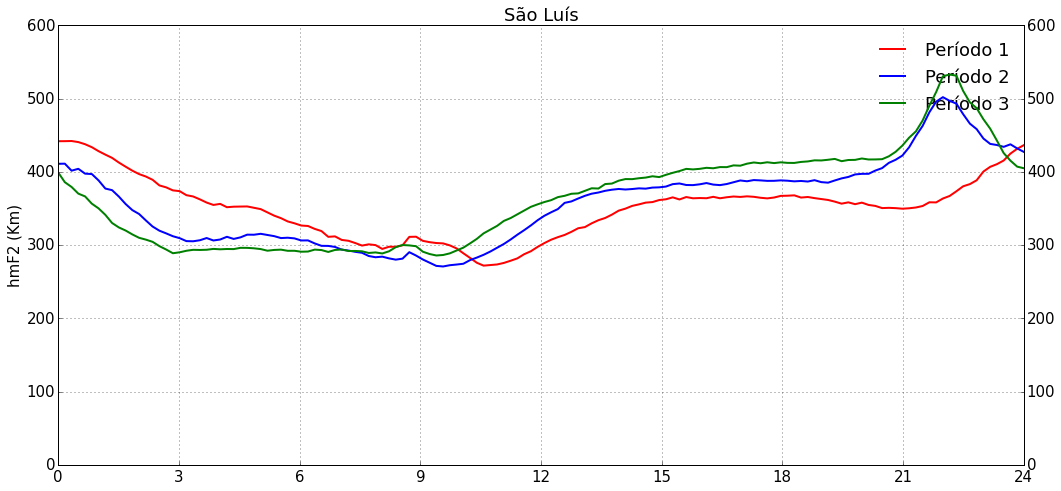

In [47]:
#Parameters to plot
rcParams['lines.linewidth']=2
rcParams['font.family']='sans-serif'
rcParams['font.serif']='Helvetica'
rcParams['figure.autolayout'] = True
rcParams['figure.figsize'] = 15,20
rcParams['font.size']=15


fig = plt.figure()
ax = fig.add_subplot(311)
ax1=ax.twiny()

bx1=ax.twinx()
bx1.set_ylim(bottom=0,top=600)



ax1.plot(time_media,media.hmF2, color='red',label = 'Per'u'íodo 1')

#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax1.set_xticks([])

#ax.plot(t,SF,',')
ax.set_ylim(bottom=0,top=600)

#ax.set_xlim(0,24)
#ax.set_xticks(np.linspace(0,24,9))
#ax.set_title('PERÍODO 3')
ax.grid()


#PERÍODO 2

#fig = plt.figure()
ax2 = fig.add_subplot(311)
ax3=ax2.twiny()

ax3.plot(time2_media2,media2.hmF22, color='blue',label='Per'u'íodo 2')
#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax3.set_xticks([])

#ax3.plot(t2,SF2,',')
ax2.set_ylim(bottom=0,top=600)

#ax2.set_xlim(0,24)
#ax2.set_xticks(np.linspace(0,24,9))
#ax2.set_title('Equin'u'ó''cios')
ax2.grid()


#fig = plt.figure()
ax4 = fig.add_subplot(311)
ax5=ax4.twiny()

ax5.plot(time1_media1,media1.hmF21, color='green', label = 'Per'u'íodo 3')
#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax5.set_xticks([])

#ax.plot(t1,SF1,',')
ax4.set_ylim(bottom=0,top=600)

ax4.set_xlim(0,24)
ax4.set_xticks(np.linspace(0,24,9))
ax4.set_title('S'u'ão Lu'u'ís')


ax2.set_ylabel('hmF2 (Km)')


h1,l1=ax1.get_legend_handles_labels()
h3,l3=ax3.get_legend_handles_labels()
h5,l5=ax5.get_legend_handles_labels()

ax1.legend(h1+h3+h5,l1+l3+l5,loc=0,frameon=False)


ax.grid()

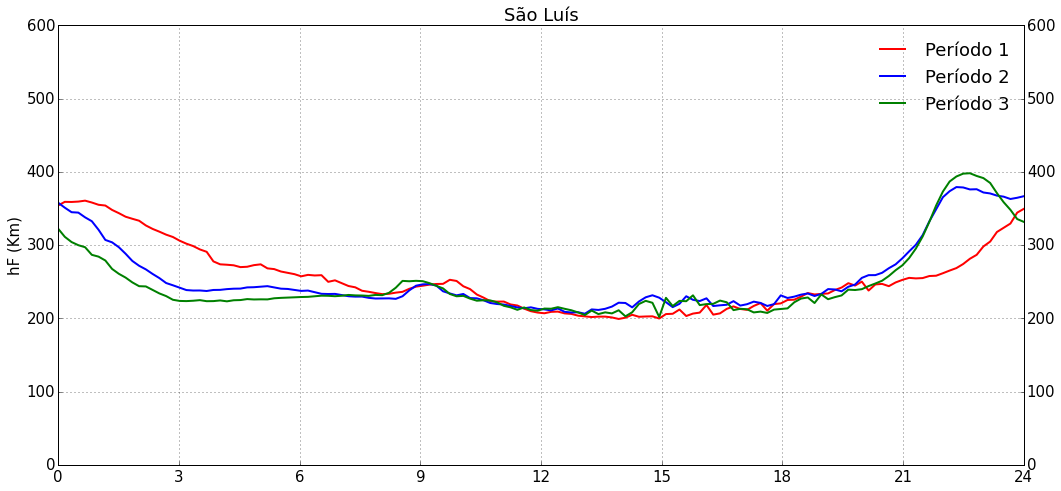

In [48]:
#Parameters to plot
rcParams['lines.linewidth']=2
rcParams['font.family']='sans-serif'
rcParams['font.serif']='Helvetica'
rcParams['figure.autolayout'] = True
rcParams['figure.figsize'] = 15,20
rcParams['font.size']=15


fig = plt.figure()
ax = fig.add_subplot(311)
ax1=ax.twiny()

bx1=ax.twinx()
bx1.set_ylim(bottom=0,top=600)



ax1.plot(time_media,media.hF, color='red',label = 'Per'u'íodo 1')

#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax1.set_xticks([])

#ax.plot(t,SF,',')
ax.set_ylim(bottom=0,top=600)

#ax.set_xlim(0,24)
#ax.set_xticks(np.linspace(0,24,9))
#ax.set_title('PERÍODO 3')
ax.grid()


#PERÍODO 2

#fig = plt.figure()
ax2 = fig.add_subplot(311)
ax3=ax2.twiny()

ax3.plot(time2_media2,media2.hF2, color='blue',label='Per'u'íodo 2')
#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax3.set_xticks([])

#ax3.plot(t2,SF2,',')
ax2.set_ylim(bottom=0,top=600)

#ax2.set_xlim(0,24)
#ax2.set_xticks(np.linspace(0,24,9))
#ax2.set_title('Equin'u'ó''cios')
ax2.grid()


#fig = plt.figure()
ax4 = fig.add_subplot(311)
ax5=ax4.twiny()

ax5.plot(time1_media1,media1.hF1, color='green', label = 'Per'u'íodo 3')
#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax5.set_xticks([])

#ax.plot(t1,SF1,',')
ax4.set_ylim(bottom=0,top=600)

ax4.set_xlim(0,24)
ax4.set_xticks(np.linspace(0,24,9))
ax4.set_title('S'u'ão Lu'u'ís')


ax2.set_ylabel('hF (Km)')


h1,l1=ax1.get_legend_handles_labels()
h3,l3=ax3.get_legend_handles_labels()
h5,l5=ax5.get_legend_handles_labels()

ax1.legend(h1+h3+h5,l1+l3+l5,loc=0,frameon=False)


ax.grid()

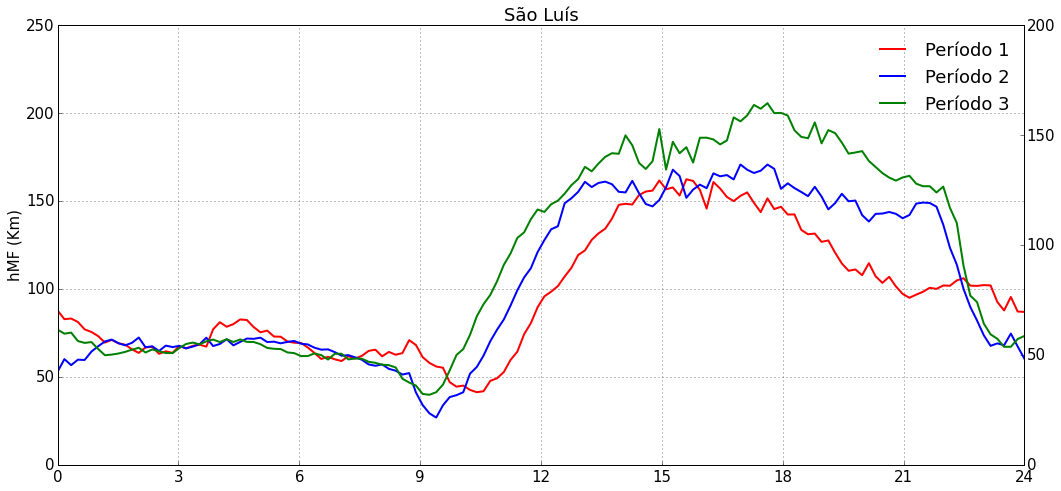

In [49]:
#Parameters to plot
rcParams['lines.linewidth']=2
rcParams['font.family']='sans-serif'
rcParams['font.serif']='Helvetica'
rcParams['figure.autolayout'] = True
rcParams['figure.figsize'] = 15,20
rcParams['font.size']=15


fig = plt.figure()
ax = fig.add_subplot(311)
ax1=ax.twiny()

bx1=ax.twinx()
bx1.set_ylim(bottom=0,top=200)



ax1.plot(time_media,media.hMF, color='red',label = 'Per'u'íodo 1')

#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax1.set_xticks([])

#ax.plot(t,SF,',')
ax.set_ylim(bottom=0,top=200)

#ax.set_xlim(0,24)
#ax.set_xticks(np.linspace(0,24,9))
#ax.set_title('PERÍODO 3')
ax.grid()


#PERÍODO 2

#fig = plt.figure()
ax2 = fig.add_subplot(311)
ax3=ax2.twiny()

ax3.plot(time2_media2,media2.hMF2, color='blue',label='Per'u'íodo 2')
#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax3.set_xticks([])

#ax3.plot(t2,SF2,',')
ax2.set_ylim(bottom=0,top=200)

#ax2.set_xlim(0,24)
#ax2.set_xticks(np.linspace(0,24,9))
#ax2.set_title('Equin'u'ó''cios')
ax2.grid()


#fig = plt.figure()
ax4 = fig.add_subplot(311)
ax5=ax4.twiny()

ax5.plot(time1_media1,media1.hMF1, color='green', label = 'Per'u'íodo 3')
#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax5.set_xticks([])

#ax.plot(t1,SF1,',')
ax4.set_ylim(bottom=0,top=250)

ax4.set_xlim(0,24)
ax4.set_xticks(np.linspace(0,24,9))
ax4.set_title('S'u'ão Lu'u'ís')


ax2.set_ylabel('hMF (Km)')


h1,l1=ax1.get_legend_handles_labels()
h3,l3=ax3.get_legend_handles_labels()
h5,l5=ax5.get_legend_handles_labels()

ax1.legend(h1+h3+h5,l1+l3+l5,loc=0,frameon=False)


ax.grid()

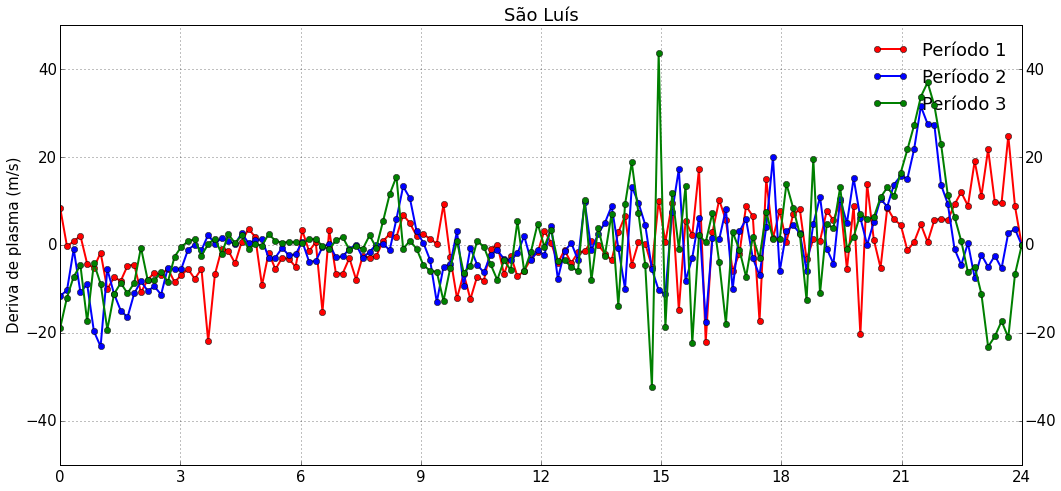

In [50]:
#Parameters to plot
rcParams['lines.linewidth']=2
rcParams['font.family']='sans-serif'
rcParams['font.serif']='Helvetica'
rcParams['figure.autolayout'] = True
rcParams['figure.figsize'] = 15,20
rcParams['font.size']=15


fig = plt.figure()
ax = fig.add_subplot(311)
ax1=ax.twiny()

bx1=ax.twinx()
bx1.set_ylim(bottom=-50,top=50)



ax1.plot(time_media,V, color='red',marker='o',label = 'Per'u'íodo 1')

#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax1.set_xticks([])

#ax.plot(t,SF,',')
ax.set_ylim(bottom=-50,top=50)

#ax.set_xlim(0,24)
#ax.set_xticks(np.linspace(0,24,9))
#ax.set_title('PERÍODO 3')
ax.grid()


#PERÍODO 2

#fig = plt.figure()
ax2 = fig.add_subplot(311)
ax3=ax2.twiny()

ax3.plot(time2_media2,V2, color='blue',marker='o',label='Per'u'íodo 2')
#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax3.set_xticks([])

#ax3.plot(t2,SF2,',')
ax2.set_ylim(bottom=-50,top=50)

#ax2.set_xlim(0,24)
#ax2.set_xticks(np.linspace(0,24,9))
#ax2.set_title('Equin'u'ó''cios')
ax2.grid()


#fig = plt.figure()
ax4 = fig.add_subplot(311)
ax5=ax4.twiny()

ax5.plot(time1_media1,V1, color='green',marker='o', label = 'Per'u'íodo 3')
#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax5.set_xticks([])

#ax.plot(t1,SF1,',')
ax4.set_ylim(bottom=-50,top=50)

ax4.set_xlim(0,24)
ax4.set_xticks(np.linspace(0,24,9))
ax4.set_title('S'u'ão Lu'u'ís')


ax2.set_ylabel('Deriva de plasma (m/s)')


h1,l1=ax1.get_legend_handles_labels()
h3,l3=ax3.get_legend_handles_labels()
h5,l5=ax5.get_legend_handles_labels()

ax1.legend(h1+h3+h5,l1+l3+l5,loc=0,frameon=False)


ax.grid()

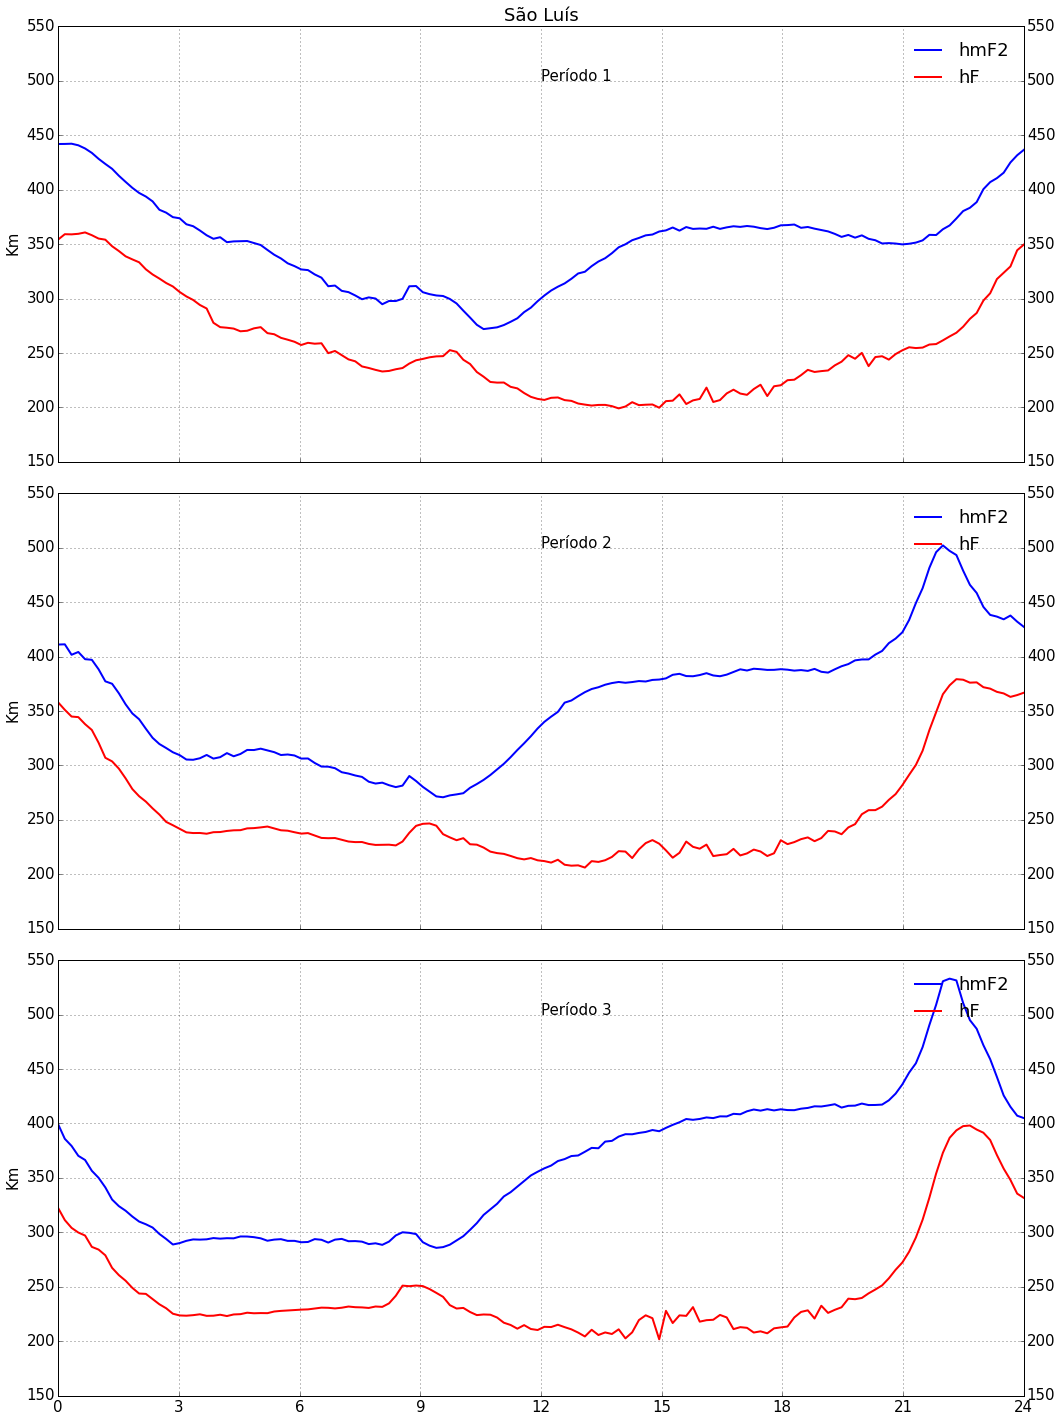

In [60]:
#Parameters to plot
rcParams['lines.linewidth']=2
rcParams['font.family']='sans-serif'
rcParams['font.serif']='Helvetica'
rcParams['figure.autolayout'] = True
rcParams['figure.figsize'] = 15,20
rcParams['font.size']=15






fig = plt.figure()
ax = fig.add_subplot(311)
ax1=ax.twiny()
bx1=ax.twinx()
bx1.set_ylim(bottom=150,top=550)


ax1.plot(time_media,media.hmF2, color='blue',label = 'hmF2')
ax.text(12,500,'Per'u'íodo 1')

#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax1.set_xticks([])
#ax.plot(t,SF,',')
ax.set_ylim(bottom=150,top=550)
ax.set_xlim(0,24)
ax.set_xticks(np.linspace(0,24,9))
ax.set_xticklabels([])
#ax.set_title('PERÍODO 3')
ax.grid()


#PERÍODO 2

#fig = plt.figure()
ax2 = fig.add_subplot(311)
ax3=ax2.twiny()

ax3.plot(time_media,media.hF, color='red',label = 'hF')
#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax3.set_xticks([])

#ax.plot(t2,SF2,',')

ax2.set_ylim(bottom=150,top=550)
#ax2.set_yticks(np.linspace(150,500,8))

#ax2.set_xlim(0,24)
#ax2.set_xticks(np.linspace(0,24,9))
#ax2.set_title('Equin'u'ó''cios')
ax2.grid()

ax3.set_title('S'u'ão Lu'u'ís' )
#ax3.set_title( 'Boa Vista'+'\n'+'  Per'u'íodo 1')



ax2.set_ylabel('Km')


h1,l1=ax1.get_legend_handles_labels()
h3,l3=ax3.get_legend_handles_labels()
#h5,l5=ax5.get_legend_handles_labels()

ax1.legend(h1+h3,l1+l3,loc=0,frameon=False)


ax.grid()

#Parameters to plot
rcParams['lines.linewidth']=2
rcParams['font.family']='sans-serif'
rcParams['font.serif']='Helvetica'
rcParams['figure.autolayout'] = True
rcParams['figure.figsize'] = 15,20
rcParams['font.size']=15


#fig = plt.figure()
ax4 = fig.add_subplot(312)
ax5=ax4.twiny()
bx5=ax4.twinx()
bx5.set_ylim(bottom=150,top=550)


ax5.plot(time2_media2,media2.hmF22, color='blue',label = 'hmF2')



#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax5.set_xticks([])

#ax.plot(t,SF,',')
ax4.set_ylim(bottom=150,top=550)
ax4.text(12,500,'Per'u'íodo 2')

#ax4.set_xlim(0,24)
ax4.set_xticks(np.linspace(0,24,9))
#ax.set_title('PERÍODO 3')
ax.grid()


#PERÍODO 2

#fig = plt.figure()
ax6 = fig.add_subplot(312)
ax7=ax6.twiny()

ax7.plot(time2_media2,media2.hF2, color='red',label = 'hF')
#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax7.set_xticks([])

#ax.plot(t2,SF2,',')

ax6.set_ylim(bottom=150,top=550)



#ax2.set_yticks(np.linspace(150,500,8))

ax6.set_xlim(0,24)
ax6.set_xticks(np.linspace(0,24,9))
ax6.set_xticklabels([])
#ax2.set_title('Equin'u'ó''cios')
ax6.grid()


ax6.set_ylabel('Km')


h5,l5=ax5.get_legend_handles_labels()
h7,l7=ax7.get_legend_handles_labels()
#h5,l5=ax5.get_legend_handles_labels()

ax7.legend(h5+h7,l5+l7,loc=0,frameon=False)
#ax5.set_title( 'Per'u'íodo 2')
#ax5.text(12,500,'Per'u'íodo 2')

ax.grid()





#Parameters to plot
rcParams['lines.linewidth']=2
rcParams['font.family']='sans-serif'
rcParams['font.serif']='Helvetica'
rcParams['figure.autolayout'] = True
rcParams['figure.figsize'] = 15,20
rcParams['font.size']=15


#fig = plt.figure()
ax8 = fig.add_subplot(313)
ax9=ax8.twiny()
bx9=ax8.twinx()
bx9.set_ylim(bottom=150,top=550)




ax9.plot(time1_media1,media1.hmF21, color='blue',label = 'hmF2')



#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax9.set_xticks([])

#ax.plot(t,SF,',')
ax8.set_ylim(bottom=150,top=550)

#ax8.set_xlim(0,24)
ax8.set_xticks(np.linspace(0,24,9))
#ax.set_title('PERÍODO 3')
ax8.grid()


#PERÍODO 2

#fig = plt.figure()
ax10 = fig.add_subplot(313)
ax11=ax10.twiny()

ax11.plot(time1_media1,media1.hF1, color='red',label = 'hF')
#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax11.set_xticks([])

#ax.plot(t2,SF2,',')

ax10.set_ylim(bottom=150,top=550)
#ax2.set_yticks(np.linspace(150,500,8))

ax10.set_xlim(0,24)
ax10.set_xticks(np.linspace(0,24,9))
#ax10.set_xticklabels([])
#ax2.set_title('Equin'u'ó''cios')
ax10.grid()


ax10.set_ylabel('Km')
#ax9.set_title( 'Per'u'íodo 3')
ax10.text(12,500,'Per'u'íodo 3')

h9,l9=ax9.get_legend_handles_labels()
h11,l11=ax11.get_legend_handles_labels()
#h5,l5=ax5.get_legend_handles_labels()

ax11.legend(h9+h11,l9+l11,loc=0,frameon=False)


ax10.grid()



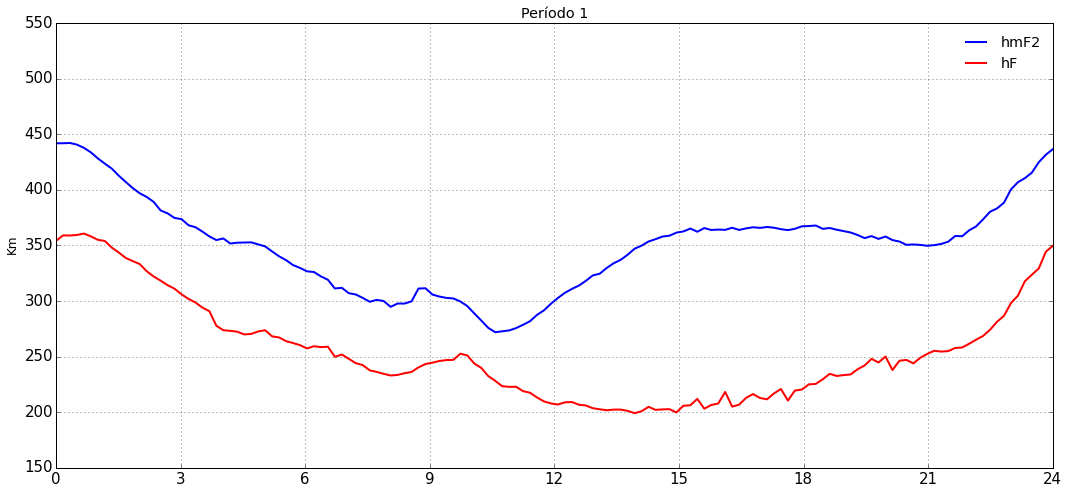

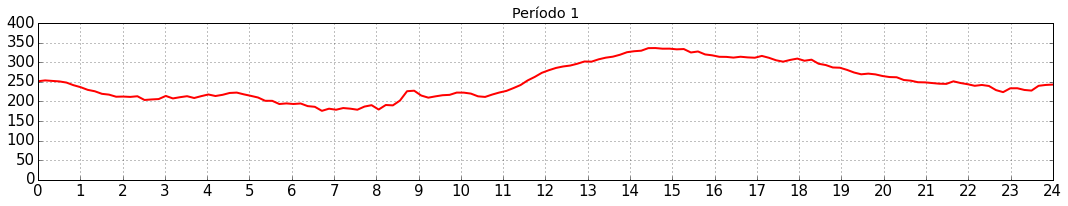

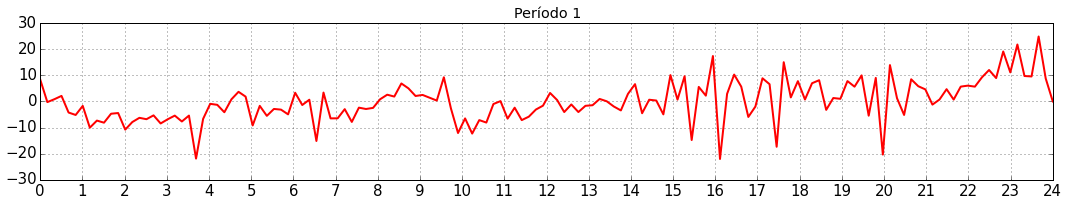

In [52]:
#Parameters to plot
rcParams['lines.linewidth']=2
rcParams['font.family']='sans-serif'
rcParams['font.serif']='Helvetica'
rcParams['figure.autolayout'] = True
rcParams['figure.figsize'] = 15,20
rcParams['font.size']=12


fig = plt.figure()
ax = fig.add_subplot(311)
ax1=ax.twiny()

ax1.plot(time_media,media.hmF2, color='blue',label = 'hmF2')



#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax1.set_xticks([])

#ax.plot(t,SF,',')
ax.set_ylim(bottom=0,top=500)

ax.set_xlim(0,24)
ax.set_xticks(np.linspace(0,24,9))
#ax.set_title('PERÍODO 3')
ax.grid()


#PERÍODO 2

#fig = plt.figure()
ax2 = fig.add_subplot(311)
ax3=ax2.twiny()

ax3.plot(time_media,media.hF, color='red',label = 'hF')
#ax1.legend(loc='upper right',frameon=False,fontsize=20)
ax3.set_xticks([])

#ax.plot(t2,SF2,',')

ax2.set_ylim(bottom=150,top=550)
#ax2.set_yticks(np.linspace(150,500,8))

ax2.set_xlim(0,24)
ax2.set_xticks(np.linspace(0,24,9))
#ax2.set_title('Equin'u'ó''cios')
ax2.grid()


ax3.set_title( 'Per'u'íodo 1')



ax2.set_ylabel('Km')


h1,l1=ax1.get_legend_handles_labels()
h3,l3=ax3.get_legend_handles_labels()
#h5,l5=ax5.get_legend_handles_labels()

ax1.legend(h1+h3,l1+l3,loc=0,frameon=False)


ax.grid()




#Parameters to plot
rcParams['lines.linewidth']=2
rcParams['font.family']='sans-serif'
rcParams['font.serif']='Helvetica'
rcParams['figure.autolayout'] = True
rcParams['figure.figsize'] = 15,8
rcParams['font.size']=12


fig = plt.figure()
ax = fig.add_subplot(311)
ax1=ax.twiny()

ax1.plot(time_media,media.SF, color='red')
ax1.set_xticks([])

#ax.plot(t,SF,',')
ax.set_ylim(bottom=0,top=400)

ax.set_xlim(0,24)
ax.set_xticks(np.linspace(0,24,25))
ax.set_title('Per'u'íodo 1')
ax.grid()

#Parameters to plot
rcParams['lines.linewidth']=2
rcParams['font.family']='sans-serif'
rcParams['font.serif']='Helvetica'
rcParams['figure.autolayout'] = True
rcParams['figure.figsize'] = 15,8
rcParams['font.size']=12


fig = plt.figure()
ax = fig.add_subplot(311)
ax1=ax.twiny()

ax1.plot(time_media,V, color='red')
ax1.set_xticks([])

#ax.plot(t,SF,',')
ax.set_ylim(bottom=-30,top=30)

ax.set_xlim(0,24)
ax.set_xticks(np.linspace(0,24,25))
ax.set_title('Per'u'íodo 1')
ax.grid()



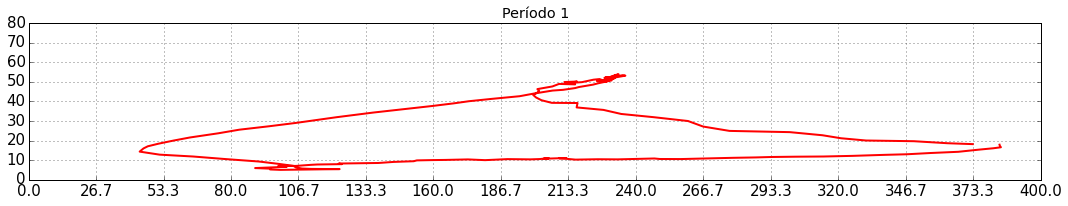

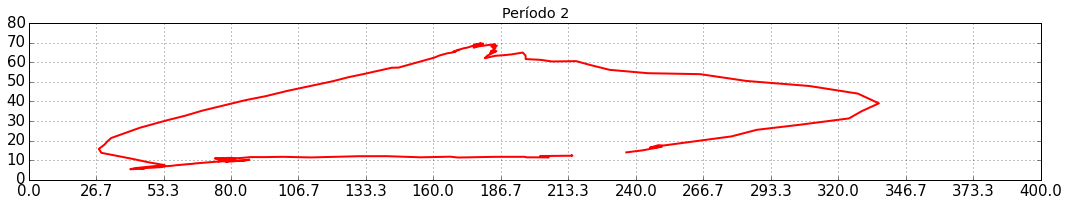

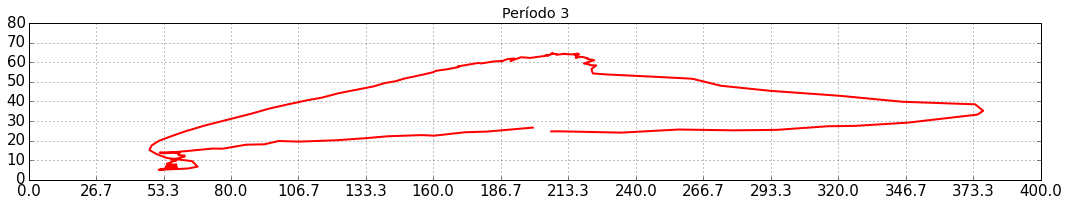

In [53]:
#Parameters to plot
rcParams['lines.linewidth']=2
rcParams['font.family']='sans-serif'
rcParams['font.serif']='Helvetica'
rcParams['figure.autolayout'] = True
rcParams['figure.figsize'] = 15,8
rcParams['font.size']=12


fig = plt.figure()
ax = fig.add_subplot(311)
ax1=ax.twiny()

ax1.plot(media.hmF2,media.TEC, color='red')
ax1.set_xticks([])

#ax.plot(t,SF,',')
ax.set_ylim(bottom=0,top=80)

ax.set_xlim(0,400)
ax.set_xticks(np.linspace(0,400,16))
ax.set_title('Per'u'íodo 1')
ax.grid()






#Parameters to plot
rcParams['lines.linewidth']=2
rcParams['font.family']='sans-serif'
rcParams['font.serif']='Helvetica'
rcParams['figure.autolayout'] = True
rcParams['figure.figsize'] = 15,8
rcParams['font.size']=12


fig = plt.figure()
ax = fig.add_subplot(311)
ax1=ax.twiny()

ax1.plot(media2.hmF22,media2.TEC2, color='red')
ax1.set_xticks([])

#ax.plot(t,SF,',')
ax.set_ylim(bottom=0,top=80)

ax.set_xlim(0,400)
ax.set_xticks(np.linspace(0,400,16))
ax.set_title('Per'u'íodo 2')
ax.grid()


#Parameters to plot
rcParams['lines.linewidth']=2
rcParams['font.family']='sans-serif'
rcParams['font.serif']='Helvetica'
rcParams['figure.autolayout'] = True
rcParams['figure.figsize'] = 15,8
rcParams['font.size']=12


fig = plt.figure()
ax = fig.add_subplot(311)
ax1=ax.twiny()

ax1.plot(media1.hmF21,media1.TEC1, color='red')
ax1.set_xticks([])

#ax.plot(t,SF,',')
ax.set_ylim(bottom=0,top=80)

ax.set_xlim(0,400)
ax.set_xticks(np.linspace(0,400,16))
ax.set_title('Per'u'íodo 3')
ax.grid()



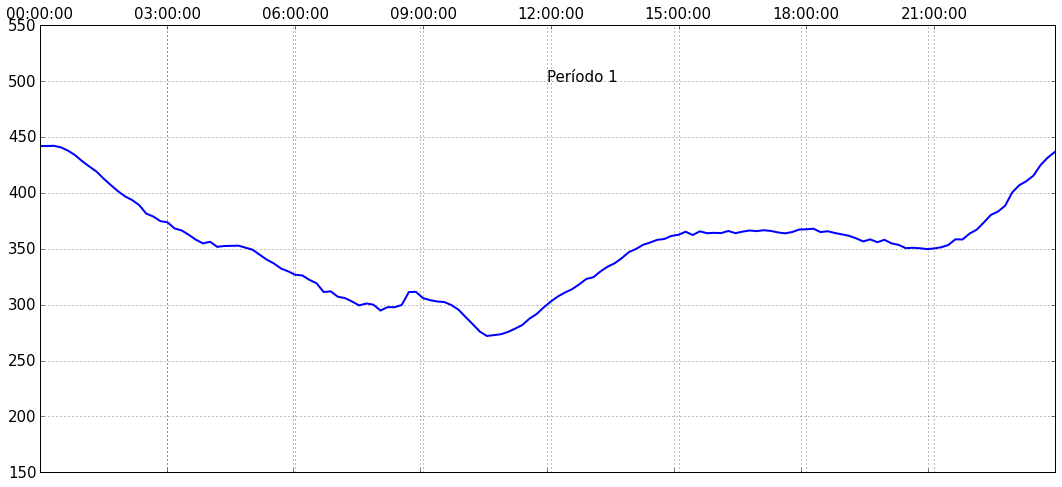

In [66]:

#Parameters to plot
rcParams['lines.linewidth']=2
rcParams['font.family']='sans-serif'
rcParams['font.serif']='Helvetica'
rcParams['figure.autolayout'] = True
rcParams['figure.figsize'] = 15,20
rcParams['font.size']=15



h1,l1=ax1.get_legend_handles_labels()
h3,l3=ax3.get_legend_handles_labels()
#h5,l5=ax5.get_legend_handles_labels()

ax1.legend(h1+h3,l1+l3,loc=0,frameon=False)



fig = plt.figure()
ax = fig.add_subplot(311)
ax1=ax.twiny()
#bx1=ax.twinx()
#bx1.set_ylim(bottom=150,top=550)


ax1.plot(time_media,media.hmF2, color='blue',label = 'hmF2')
ax.text(12,500,'Per'u'íodo 1')

#ax1.legend(loc='upper right',frameon=False,fontsize=20)
#ax1.set_xticks([])
#ax.plot(t,SF,',')
ax.set_ylim(bottom=150,top=550)
ax.set_xlim(0,24)
ax.set_xticks(np.linspace(0,24,9))
ax.set_xticklabels([])
#ax.set_title('PERÍODO 3')
ax.grid()




#ax.grid()

